<div style="text-align: center; display: flex; justify-content: center; align-items: center; height: 200px;">
    <img src="https://acei.co/wp-content/uploads/2017/11/logo-universidad-externado-de-colombia.jpg" alt="Logo de la Universidad Externado de Colombia" style="width: 500px; height: auto;">
</div>

<h1><center>Caso de estudio</center></h1>

<h2><center>Luciana Pérez Durán</center></h2>

<h3><center>Maestría en Inteligencia de Negocios</center></h3>
<h3><center>Seminario de programación</center></h3>


<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-datos" data-toc-modified-id="Exploración-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración datos</a></span></li><li><span><a href="#Nivel-de-obesidad" data-toc-modified-id="Nivel-de-obesidad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nivel de obesidad</a></span></li><li><span><a href="#Exploración-Previa---Solo-cuantitativa" data-toc-modified-id="Exploración-Previa---Solo-cuantitativa-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploración Previa - Solo cuantitativa</a></span></li><li><span><a href="#Exploración-Total" data-toc-modified-id="Exploración-Total-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploración Total</a></span></li><li><span><a href="#Aprendizaje-Supervisado" data-toc-modified-id="Aprendizaje-Supervisado-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aprendizaje Supervisado</a></span></li></ul></div>

#  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:

[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)



Este ejercicio guiado pretende que ustedes hagan una exploración completa a la base, identifiquen grupos en la población y desarrolen modelos que permitan determinar el nivel de obesidad para cualquier individuo.

Después de descargar, cargamos la base:

In [209]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 
from sklearn import linear_model
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [186]:
DataO=pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv')

## Exploración de datos

En la siguiente sección se relizará un análisis de datos exploratorio (EDA) de la base de datos de Obesidad. 

In [187]:
DataO.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


En la base de datos se registran otras variables como:

- **Gender:** Género.
- **Age:** Edad.
- **Height:** Altura.
- **Weight:** Peso.
- **family_history_with_overweight:** Historia familiar con sobrepeso

Variables relacionadas con hábitos alimenticios:

- **Frequent consumption of high caloric food (FAVC):** Frecuencia de consumo de alimentos altos en calorías.
- **Frequency of consumption of vegetables (FCVC):** Frecuencia de consumo de vegetales.
- **Number of main meals (NCP):** Número de comidas principales.
- **Consumption of food between meals (CAEC):** Consumo de alimentos entre comidas.
- **Smoke:** Fuma
- **Consumption of water daily (CH20):** Consumo diario de agua.
- **Consumption of alcohol (CALC):** Consumo de alcohol.

También se incluyen variables relacionadas con la condición física:

- **Calories consumption monitoring (SCC):** Monitoreo del consumo de calorías.
- **Physical activity frequency (FAF):** Frecuencia de actividad física.
- **Time using technology devices (TUE):** Tiempo de uso de dispositivos tecnológicos.
- **Transportation used (MTRANS):** Medio de transporte utilizado.

### Tipo de datos 

In [189]:
DataO.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

En el conjunto de datos se encuentra una variedad de tipos de variables que son fundamentales para comprender y analizar la información, entre esos tipos se encuntran variables categóricas como "Gender," "family_history_with_overweight," "FAVC," "CAEC," "SMOKE," "SCC," "CALC,","MTRANS" y "NObeyesdad". De igual forma, se encuentran variables numéricas como "Age," "Height," "Weight," "FCVC," "NCP," "CH2O," "FAF," y "TUE." Estas variables representan mediciones cuantitativas y pueden tomar una amplia gama de valores.

### Codificación de variables categóricas. 

En el procesamiento de datos de la base 'DataO', se realizaron transformaciones significativas para preparar las variables categóricas y la variable objetivo para su uso en modelos de aprendizaje automático. Se utilizaron técnicas de mapeo para codificar las variables categóricas en valores numéricos. Por ejemplo, la variable "Gender" se transformó en una variable binaria, donde 'Female' se asignó a 0 y 'Male' a 1. Lo mismo se hizo con otras variables categóricas, como "family_history_with_overweight," "FAVC," "CAEC," "SMOKE," "SCC," "CALC," y "MTRANS," donde se asignaron valores numéricos que representan diferentes categorías. Además, la variable objetivo, "NObeyesdad," también se transformó en valores numéricos asignando un número único a cada categoría, como 'Insufficient_Weight' se mapeó a 0, 'Normal_Weight' a 1, y así sucesivamente. 

In [191]:
DataO['Gender'] = DataO['Gender'].map({'Female': 0, 'Male': 1})
DataO['family_history_with_overweight'] = DataO['family_history_with_overweight'].map({'no': 0, 'yes': 1})
DataO['FAVC'] = DataO['FAVC'].map({'no': 0, 'yes': 1})
DataO['CAEC'] = DataO['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
DataO['SMOKE'] = DataO['SMOKE'].map({'no': 0, 'yes': 1})
DataO['SCC'] = DataO['SCC'].map({'no': 0, 'yes': 1})
DataO['CALC'] = DataO['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
DataO['MTRANS'] = DataO['MTRANS'].map({'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4})

DataO['NObeyesdad'] = DataO['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
                                               'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 
                                               'Obesity_Type_III': 6})

### Descripción de la base de datos

In [192]:
DataO.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.488394,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.868475,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,1.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [193]:
DataO.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

La base de datos no tiene datos faltantes

### Visualización de la variable de interés 

* Gráfico de barras de la la variable **'NObeyesdad'**

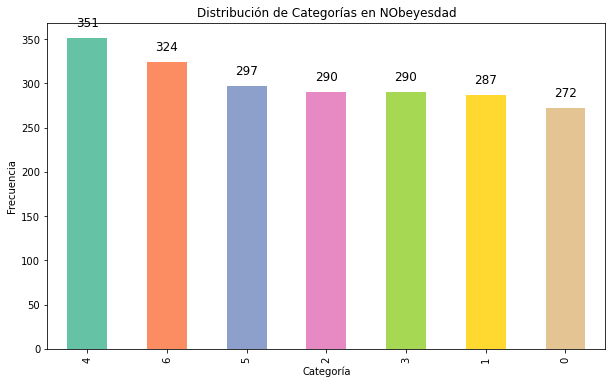

In [272]:
colores = sns.color_palette("Set2")
counts = DataO['NObeyesdad'].value_counts()

plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar', color=colores)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías en NObeyesdad')

for i, v in enumerate(counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12)
plt.show()

En el gráfico de barras que representa la distribución de categorías de la variable 'NObeyesdad', se puede observar que la categoría con el valor más alto es Obesity_Type_I (4), seguida de cerca por la categoría Obesity_Type_III (6). Estas categorías tienen una presencia mayor en los datos en comparación con las demás. Por otro lado, la categoría con el valor más bajo es Insufficient_Weight (0). 

### Correlación

In [195]:
DataO.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,-0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,-0.007616,0.164116,-0.031464
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.567983,0.282913
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.085768,0.133565
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,-0.046615,0.913251
family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.065036,0.505148
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,-0.009102,0.247793
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,-0.065098,0.227759
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.059022,0.026690
CAEC,-0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.003556,-0.329350
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,0.021045,0.003442


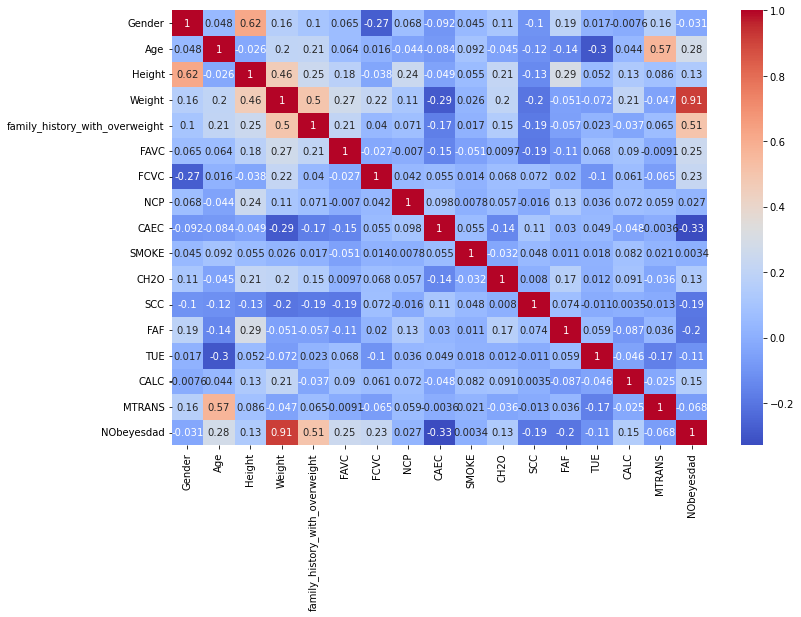

In [196]:
correlation_matrix = DataO.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

La matriz de correlación revela una correlación significativa (0.91) entre la variable "peso" y el nivel de obesidad. Esta correlación es coherente, dado que el peso desempeña un papel crucial en el cálculo del índice de masa corporal (IMC) y, por ende, en la determinación de la obesidad.

## Nivel de obesidad

Es claro que la altura y el peso son determinantes en el Nivel de obesidad, como lo muestra el siguiente gráfico:

<AxesSubplot:xlabel='Weight', ylabel='Height'>

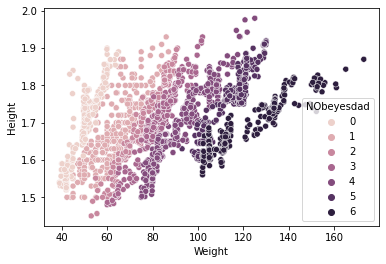

In [197]:
sns.scatterplot(data=DataO,x='Weight',y='Height',hue='NObeyesdad')

Extraiga esas columnas de la base y haga los análisis a continuación sin tener en cuenta esas variables. Responda:


In [198]:
DataO.drop(['Weight', 'Height'],axis = 1, inplace = True)

**¿Tiene sentido haber extraido esas variables? ¿Cómo afectará a mi investigación no tenerlas en cuenta?**

Dado la fuerte correlación entre el peso, la altura y la obesidad, se realiza la extracción de estas variables que permitirá que el modelo se centre en el aprendizaje de las demás variables sin la influencia del peso y la altura. Sin embargo, al eliminar estas variables, es probable que la precisión de los modelos se reduzca, lo que brindará la oportunidad de explorar con mayor profundidad las otras características del conjunto de datos.

## Exploración Previa - cuantitativa

1. Tomen las variables cuantitativas y determinen agrupamientos en la base de datos. No olviden fijar una semilla para la revisión del trabajo. No duden en usar métodos que permitan determinar un valor adecuado de agrupamientos.


2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usen reducciones de dimensionalidad.

### Análisis de Componentes Principales (PCA)

In [263]:
variables_cuantitativas = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']
data_cuanti = DataO[variables_cuantitativas]

Se realiza la estandarización de los datos

In [265]:
scaler = StandardScaler()
data_cuanti = scaler.fit_transform(data_cuanti)

Se realiza un análisis de componentes principales (PCA) con el objetivo de reducir la dimensionalidad de los datos en data_cuanti a dos componentes principales (PC1 y PC2) con el propósito de una representación bidimensional que sea más fácil de visualizar y comprender.

In [269]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_cuanti)
DFPC = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
DFPC

,PC1,PC2
0,-0.929093,0.934629
1,-0.995585,-2.384985
2,-1.599954,-0.057290
3,0.240540,-0.953882
4,0.682637,1.783699
...,...,...
2106,0.278076,-1.173042
2107,0.725561,-1.250111
2108,0.707064,-1.327132
2109,1.013386,-1.928546


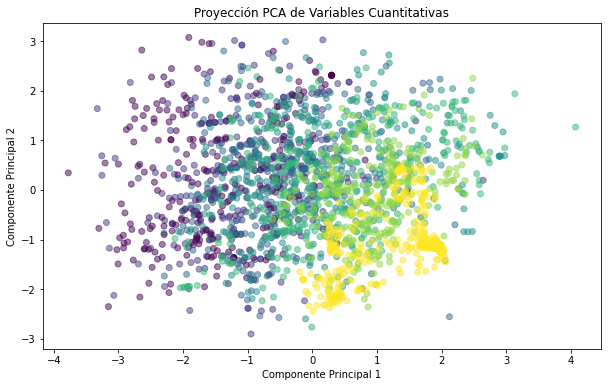

In [202]:
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=DataO['NObeyesdad'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA de Variables Cuantitativas')
plt.show()

 * Varianza explicada

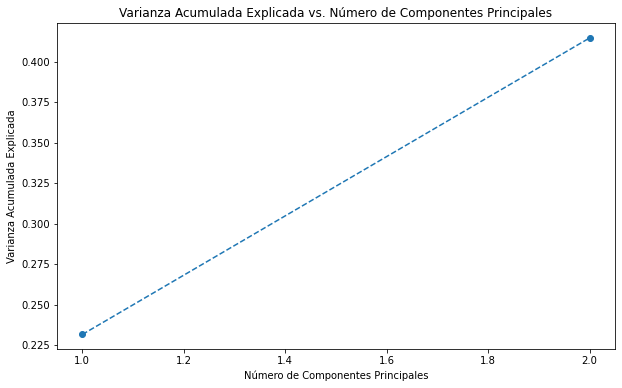

In [203]:
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1, 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada vs. Número de Componentes Principales')
plt.show()

* Análisis de coeficientes de carga

In [204]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=variables_cuantitativas)
print("Coeficientes de Carga:")
print(loadings_df) 

Coeficientes de Carga:
                 PC1       PC2
Age         0.706619  0.108629
FCVC        0.335969 -0.504503
NCP        -0.127682 -0.481754
CH2O       -0.014215 -0.670453
FAF        -0.457896 -0.492510
TUE        -0.562824 -0.008996
NObeyesdad  0.682618 -0.306006


**PC1:** En el primer componente principal, Age (Edad) tiene un coeficiente de carga positivo relativamente alto (0.7066), lo que significa que esta variable está fuertemente relacionada con PC1 y contribuye significativamente a la construcción de PC1. FCVC, FAF, y NObeyesdad también tienen coeficientes de carga positivos, aunque menos pronunciados. En contraste, CH2O y TUE tienen coeficientes de carga negativos en PC1, lo que sugiere una relación inversa con este componente.

**PC2:** En el segundo componente principal, FCVC (Frequency of consumption of vegetables) tiene un coeficiente de carga negativo significativo (-0.5045), lo que indica una fuerte relación inversa con PC2. Además, NCP y CH2O tienen coeficientes de carga negativos en PC2, lo que sugiere una relación inversa con este componente. TUE y FAF también tienen coeficientes de carga negativos, pero su magnitud es menor en comparación con FCVC.

## Exploración Total

1. Crearemos Clusters usando también las variables cualitativas, el ejercicio consiste en poder medir distancias incluso entre variables/componentes cualitativas. Lo haremos con la distancia de Gower (qué es y como se calcula en Python), con esta distancia se monta una matriz de distancias entre los datos. 

2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usar reducciones de dimensionalidad.

**Solución:**

La distancia de Gower se puede utilizar para medir qué tan diferentes son dos registros. Los registros pueden contener una combinación de datos lógicos, categóricos, numéricos o de texto. La distancia es siempre un número entre 0 (idéntico) y 1 (máximamente diferente). 

Las métricas utilizadas para cada tipo de datos se describen a continuación:

- Cuantitativo (intervalo): distancia de Manhattan normalizada por rango.

- Ordinal: la variable se clasifica primero, luego la distancia de Manhattan se usa con un ajuste especial para los empates.

- Nominal: las variables de k categorías se convierten primero en k columnas binarias y luego se usa el coeficiente de Dice.


En esencia, la distancia de Gower es calculada como el promedio de disimilaridades parciales entre individuos. De manera general, este coeficiente se calcula como sigue:

$$D_{Gow}(x_1,x_2)=1-\frac{1}{p}\sum\limits_{j=1}^p s_j(x_1,x_2).$$

Aquí $s_j(x_1,x_2)$ se conoce como la similaridad parcial de $j$-ésimo descriptor.



Para descriptores cuantitativos tenemos:

$$s_j(x_1,x_2)=1-\cfrac{|y_{1j}-y_{2j}|}{R_j}$$

Para descriptores cualitativos se usa el coeficiente de Sorensen-Dice, se calcula de la siguiente forma:

$$s_j(x_1,x_2)=1-\frac{NNEQ}{NTT+NNZ}$$

donde (tomado de scikit-learn):

***

N : number of dimensions

NTT : number of dims in which both values are True

NTF : number of dims in which the first value is True, second is False

NFT : number of dims in which the first value is False, second is True

NFF : number of dims in which both values are False

NNEQ : number of non-equal dimensions, NNEQ = NTF + NFT

NNZ : number of nonzero dimensions, NNZ = NTF + NFT + NTT
***



|reg|Color|orientacion|
|:--:|:--:|:--:|
|1|Amarillo|izquierda|
|2|Amarillo|derecha|

|reg|Amarillo|Azul|Rojo|Derecha|izquierda|
|:--:|:--:|:--:|:--:|:--:|:-:|
|1|1|0|0|0|1|
|2|1|0|0|1|0|


Ahora calculemos la distancia de Gower:




In [215]:
columns=['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

In [216]:
DataO[columns]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,1
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0


* Matriz de distancia de Gower

In [217]:
import gower as gw
distance_matrix=gw.gower_matrix(DataO[columns])
distance_matrix

array([[0.00, 0.35, 0.17, ..., 0.18, 0.21, 0.20],
       [0.35, 0.00, 0.37, ..., 0.31, 0.29, 0.30],
       [0.17, 0.37, 0.00, ..., 0.23, 0.27, 0.27],
       ...,
       [0.18, 0.31, 0.23, ..., 0.00, 0.04, 0.04],
       [0.21, 0.29, 0.27, ..., 0.04, 0.00, 0.01],
       [0.20, 0.30, 0.27, ..., 0.04, 0.01, 0.00]], dtype=float32)

In [218]:
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(distance_matrix)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [219]:
scaler = StandardScaler()
distance_matrix_standardized = scaler.fit_transform(distance_matrix)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(distance_matrix_standardized)

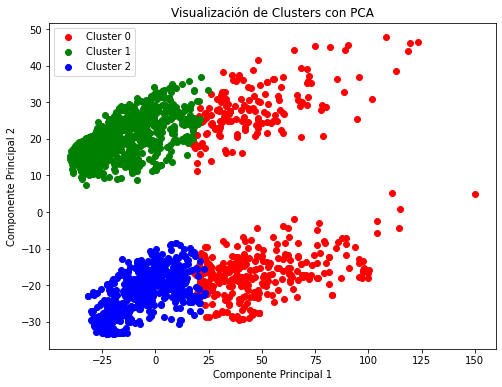

In [220]:
data_to_plot = pd.DataFrame({'PC1': principal_components[:, 0], 'PC2': principal_components[:, 1], 'Cluster': cluster_labels})
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b'] 
for cluster in range(num_clusters):
    cluster_data = data_to_plot[data_to_plot['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], c=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters con PCA')
plt.legend()
plt.show()


## Aprendizaje Supervisado

En esta sección crearemos modelos que permitan responder la pregunta inicial:

1. Particionan la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.
2. Usando la base de entrenamiento crearán algunos modelos de clasificación con los siguientes métodos:

* Regresión Logística
* Clasificador Naive Bayes 
* Arboles de decisión
* Random Forest 
* SVM

3. Usando la base de testeo validar cada modelo (Uso matrices de confusión, estadísticos apropiados, curvas ROC, AUC...)

## **Regresión Logística**

El primer enfoque de clasificación que se realizará es la regresión logística. La regresión logística es un enfoque estadístico diseñado para modelar la probabilidad de ocurrencia de un resultado cualitativo binario (con dos posibles valores) en función de uno o más predictores o variables independientes. Su uso principal radica en la creación de modelos de clasificación binaria.

Se realiza una reducción de dimensionalidad utilizando Análisis de Componentes Principales (PCA) para reducir la cantidad de características a 3.

In [270]:
escala=StandardScaler(with_mean=True, with_std=True) 
pca=PCA(n_components=3)
X=DataO[['Gender', 'Age', 'family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC', 'FAF','TUE','CALC','MTRANS','NObeyesdad']]
X=escala.fit_transform(X)
pca.fit_transform(X)

array([[1.51, -0.04, -0.35],
       [2.49, 1.04, -1.05],
       [1.14, 0.20, 1.28],
       ...,
       [-0.96, -1.48, -0.84],
       [-1.31, -1.58, -0.70],
       [-1.25, -1.71, -0.68]])

In [222]:
otrabase=DataO
otrabase['Comp1']=pca.fit_transform(X).T[0]
otrabase['Comp2']=pca.fit_transform(X).T[1]
otrabase['Comp3']=pca.fit_transform(X).T[2]
otrabase

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Comp1,Comp2,Comp3
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,1,1.508710,-0.041173,-0.342753
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,1,2.491384,1.046217,-1.042112
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,1,1.145663,0.201652,1.278363
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,1,2,1.128345,1.674434,-0.383551
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,3,1.380895,0.865841,-0.839790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,6,-0.680923,-1.617756,-0.709305
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,6,-0.949926,-1.489360,-0.908639
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,6,-0.965590,-1.483738,-0.844154
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,6,-1.306878,-1.583462,-0.704441


<AxesSubplot:xlabel='Comp1', ylabel='Comp2'>

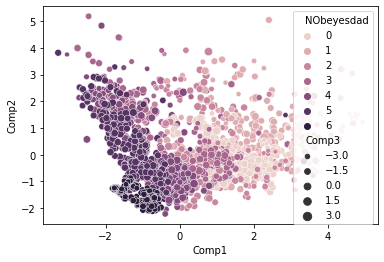

In [73]:
sns.scatterplot(data=otrabase,x='Comp1',y='Comp2',hue='NObeyesdad',size='Comp3')

In [223]:
X=DataO[['Gender', 'Age', 'family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC', 'FAF','TUE','CALC','MTRANS']]
y=DataO['NObeyesdad']

+ Particiono la base en una de entrenamiento y otra de testeo

In [224]:
X_entreno,X_testeo,Y_entreno,Y_testeo = model_selection.train_test_split(X,y,test_size=0.2,random_state=29)

In [225]:
X_entreno.shape

(1688, 14)

In [226]:
X_testeo.shape

(423, 14)

* Defino el modelo y ajusto hiperparámetros

In [227]:
reglogistica=linear_model.LogisticRegression(max_iter=100,solver='liblinear',random_state=29)

* Entrenamos el modelo

In [228]:
reglogistica.fit(X_entreno,Y_entreno)

LogisticRegression(random_state=29, solver='liblinear')

In [229]:
I=reglogistica.intercept_
I

array([1.16, 1.34, 0.35, -1.18, -0.65, -5.76, -5.95])

In [230]:
A=reglogistica.coef_
A

array([[-0.52, -0.28, -1.88, 0.34, 0.67, 0.53, 0.92, -1.45, -0.07, -0.49,
        0.02, 0.53, -0.83, 0.32],
       [0.22, -0.10, -1.08, -0.75, -0.33, -0.02, 1.07, 0.90, -0.30, 0.08,
        0.24, -0.08, 0.04, 0.38],
       [-0.22, -0.03, -0.45, 1.05, -0.60, -0.23, -1.04, -0.47, 0.14,
        1.75, 0.19, -0.14, 0.78, 0.28],
       [0.78, 0.09, 1.39, -2.06, -0.59, -0.43, -0.26, -0.54, 0.06, -1.55,
        -0.20, 0.46, -0.23, -0.15],
       [-0.23, 0.02, 2.25, 1.18, -1.22, -0.55, -0.59, 0.12, 0.49, -1.06,
        -0.08, -0.03, -0.80, 0.16],
       [3.74, 0.10, 1.95, 0.51, 0.19, 0.09, -1.78, 0.55, -1.09, -1.24,
        -0.19, -0.44, 0.18, -0.32],
       [-4.18, -0.19, 2.40, 0.98, 3.07, 0.60, -2.58, -0.76, -0.12, -2.43,
        -0.93, -0.96, 1.57, -2.12]])

In [231]:
reglogistica.predict(X_testeo)

array([1, 4, 4, 6, 4, 6, 5, 0, 2, 5, 2, 6, 6, 5, 6, 0, 5, 0, 3, 5, 5, 0,
       3, 2, 4, 2, 5, 2, 5, 5, 6, 3, 2, 6, 4, 5, 4, 1, 2, 5, 6, 4, 6, 1,
       0, 5, 0, 5, 6, 4, 6, 4, 5, 6, 5, 4, 5, 5, 5, 1, 6, 5, 0, 3, 3, 2,
       6, 4, 1, 6, 4, 6, 2, 5, 2, 3, 5, 5, 6, 4, 3, 2, 5, 5, 5, 2, 1, 6,
       3, 5, 5, 0, 0, 4, 5, 3, 6, 5, 6, 2, 5, 6, 5, 4, 1, 4, 5, 5, 3, 2,
       6, 6, 1, 5, 1, 4, 6, 6, 2, 4, 5, 3, 5, 4, 6, 3, 4, 4, 5, 5, 2, 6,
       4, 5, 6, 2, 4, 4, 2, 2, 0, 5, 5, 2, 3, 4, 3, 4, 3, 0, 2, 6, 6, 0,
       4, 0, 6, 6, 1, 3, 5, 2, 0, 6, 5, 4, 1, 6, 2, 4, 5, 5, 5, 1, 1, 4,
       4, 6, 5, 4, 5, 5, 4, 1, 4, 5, 4, 5, 2, 3, 4, 4, 6, 0, 5, 0, 4, 6,
       4, 2, 5, 3, 5, 6, 4, 5, 2, 5, 4, 3, 6, 5, 5, 4, 4, 0, 4, 6, 6, 5,
       5, 4, 1, 6, 6, 0, 4, 0, 5, 3, 5, 4, 3, 2, 5, 3, 6, 5, 5, 0, 2, 6,
       3, 5, 5, 1, 0, 4, 2, 2, 4, 1, 6, 5, 1, 6, 6, 4, 6, 3, 4, 1, 2, 0,
       0, 4, 4, 4, 0, 6, 2, 5, 3, 0, 4, 3, 0, 5, 4, 5, 0, 4, 6, 6, 0, 0,
       4, 6, 5, 5, 6, 6, 4, 6, 0, 6, 2, 5, 1, 4, 1,

In [232]:
pd.DataFrame(data=[Y_entreno.values,reglogistica.predict(X_entreno)],columns=Y_entreno.index,index=['Real','Predicho'])

,1833,0,1547,721,1674,691,1207,393,2090,381,...,1687,1998,660,241,2040,2005,920,1393,864,808
Real,6,1,5,0,5,0,3,3,6,1,...,5,6,0,2,6,6,2,4,2,2
Predicho,6,3,5,0,5,0,5,2,6,1,...,5,6,1,0,6,6,2,4,5,5


* Como predice el modelo

Aplica logística para cada clase de la variable objetivo y clasifica según la clase que tiene mayor probabilidad.

In [233]:
X_predicciones=dict()
X_predicciones['predicción']=reglogistica.predict(X_entreno)

In [234]:
reglogistica.predict_proba(X_entreno)

array([[0.02, 0.02, 0.07, ..., 0.09, 0.01, 0.73],
       [0.10, 0.12, 0.03, ..., 0.16, 0.01, 0.04],
       [0.01, 0.05, 0.13, ..., 0.14, 0.46, 0.00],
       ...,
       [0.08, 0.09, 0.09, ..., 0.36, 0.13, 0.00],
       [0.03, 0.06, 0.08, ..., 0.06, 0.60, 0.03],
       [0.02, 0.10, 0.17, ..., 0.18, 0.40, 0.01]])

In [235]:
X_predicciones['Real']=Y_entreno

* Validaciones

In [236]:
reglogistica.score(X_entreno,Y_entreno)

0.5853080568720379

In [237]:
reglogistica.score(X_testeo, Y_testeo)

0.541371158392435

In [238]:
print(classification_report(Y_testeo,reglogistica.predict(X_testeo)))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53        53
           1       0.42      0.25      0.31        52
           2       0.52      0.35      0.42        63
           3       0.33      0.26      0.29        53
           4       0.45      0.50      0.47        74
           5       0.52      0.84      0.65        63
           6       0.80      0.98      0.88        65

    accuracy                           0.54       423
   macro avg       0.52      0.53      0.51       423
weighted avg       0.52      0.54      0.52       423



**Matriz de confusión**

In [239]:
CM=confusion_matrix(Y_testeo, reglogistica.predict(X_testeo))
CM

array([[26, 11,  5,  0,  6,  5,  0],
       [14, 13,  8,  4,  8,  4,  1],
       [ 1,  3, 22,  6, 14, 11,  6],
       [ 2,  0,  6, 14, 16, 13,  2],
       [ 2,  3,  1,  9, 37, 15,  7],
       [ 0,  1,  0,  8,  1, 53,  0],
       [ 0,  0,  0,  1,  0,  0, 64]], dtype=int64)

* Mapa de calor que representa visualmente la matriz de confusión

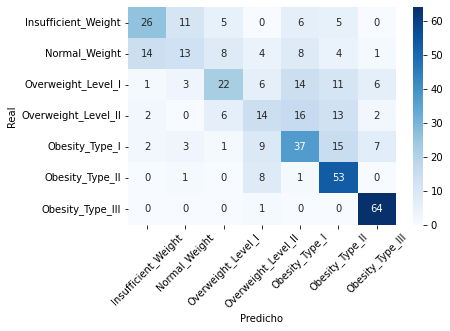

In [240]:
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.heatmap(CM, annot=True, cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks([i + 0.5 for i in range(len(labels))], labels, rotation=45)
plt.yticks([i + 0.5 for i in range(len(labels))], labels, rotation=0)
plt.show()

In [241]:
Y_pred_prob=reglogistica.predict_proba(X_testeo)

Prob = pd.DataFrame(Y_pred_prob, columns=['0', '1', '2', '3', '4', '5', '6'])
Prob['Result']=reglogistica.predict(X_testeo)
Prob

,0,1,2,3,4,5,6,Result
0,0.420089,0.452268,0.108823,0.007777,0.010668,0.000299,0.000077,1
1,0.000847,0.019532,0.070187,0.306857,0.507451,0.094787,0.000338,4
2,0.072406,0.085399,0.160150,0.078886,0.552062,0.006347,0.044749,4
3,0.021427,0.025415,0.064869,0.055078,0.058201,0.027423,0.747587,6
4,0.003702,0.069670,0.238207,0.243965,0.311598,0.116884,0.015974,4
...,...,...,...,...,...,...,...,...
418,0.020849,0.064343,0.162412,0.056669,0.156309,0.015872,0.523546,6
419,0.027573,0.103720,0.036706,0.554990,0.260789,0.004437,0.011786,3
420,0.030604,0.032030,0.060221,0.065872,0.044357,0.044454,0.722461,6
421,0.024694,0.021400,0.078608,0.065291,0.091147,0.009308,0.709552,6


In [242]:
Y_testeo_dummy=pd.get_dummies(Y_testeo)
Y_testeo_dummy

,0,1,2,3,4,5,6
631,1,0,0,0,0,0,0
1216,0,0,0,0,1,0,0
1321,0,0,0,0,1,0,0
1844,0,0,0,0,0,0,1
820,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
938,0,0,1,0,0,0,0
1021,0,0,0,1,0,0,0
1848,0,0,0,0,0,0,1
1819,0,0,0,0,0,0,1


In [243]:
fpr, tpr, umbrales=roc_curve(Y_testeo_dummy[0],Y_pred_prob[:,0])

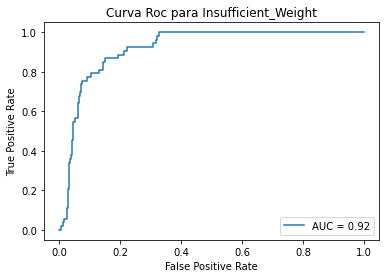

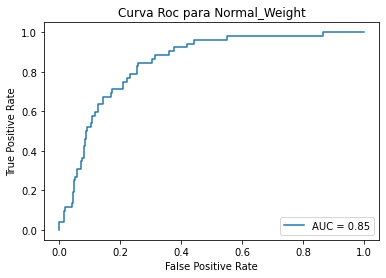

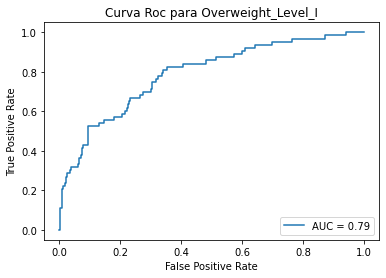

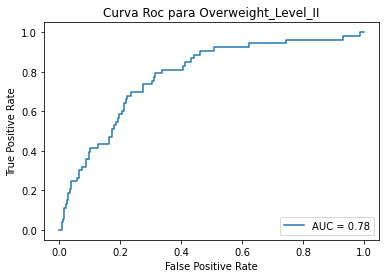

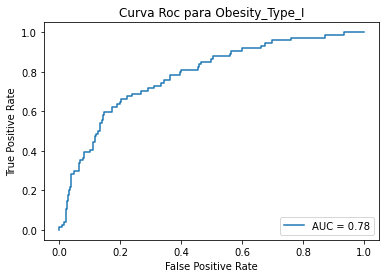

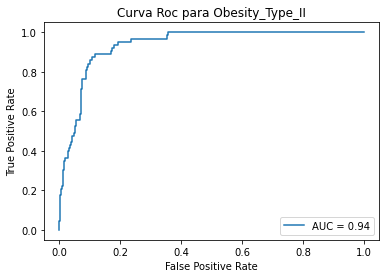

In [244]:
osd=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
for i in range(6):
    fpr, tpr, umbrales=roc_curve(Y_testeo_dummy[i],Y_pred_prob[:,i])
    AUC=auc(fpr,tpr)
    display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=AUC)
    display.plot()
    plt.title('Curva Roc para '+osd[i])
plt.show()

- El AUC para "Insufficient Weight" es 0.92, lo que indica que el modelo tiene una alta capacidad para distinguir esta categoría de las demás.

- Para "Normal Weight", el AUC es 0.85, lo que sugiere una buena capacidad de discriminación, aunque no tan alta como en la categoría anterior.

- "Overweight Level I" tiene un AUC de 0.79, lo que significa que el modelo puede distinguir esta categoría, pero su capacidad es un poco más limitada que en las dos categorías anteriores.

- Las categorías "Overweight Level II", "Obesity Type I", "Obesity Type II" tienen AUC de 0.78, lo que indica que el modelo tiene una capacidad similar para diferenciar entre estas categorías, y es un poco menos preciso que en las categorías anteriores.

- Finalmente, "Obesity Type III" tiene el AUC más alto de 0.94, lo que sugiere que el modelo es altamente preciso en la clasificación de esta categoría.

Importancia relativa de las características

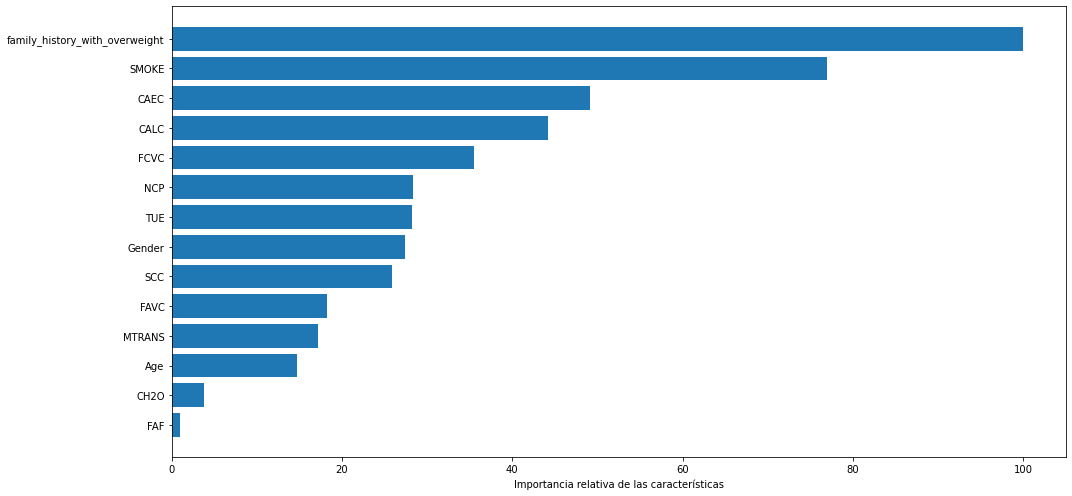

In [245]:
importancia = abs(reglogistica.coef_[0])
importancia = 100.0 * (importancia / importancia.max())
sorted_idx = np.argsort(importancia)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(15, 7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, importancia[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Importancia relativa de las características')
plt.tight_layout()
plt.show()

El gráfico proporciona información sobre la importancia relativa de diferentes características en la predicción de la obesidad. Se destaca que las tres variables más significativas en este modelo son los antecedentes familiares, si fuma y el consumo de alimentos entre comidas. 

## **Arboles de decisión**

El árbol de decisión es un método de aprendizaje supervisado que no depende de parámetros específicos, utilizado para tareas de clasificación y regresión. Su estructura se organiza jerárquicamente en forma de árbol, compuesta por un nodo raíz, ramas, nodos internos y nodos hoja. 

La construcción del árbol se realiza de manera descendente, con el objetivo de agrupar observaciones similares y establecer reglas que maximicen la homogeneidad dentro de cada grupo y la heterogeneidad entre grupos diferentes. Cada nodo hoja representa una categoría específica de datos, y en el caso de variables continuas, se dividen en intervalos para facilitar su manejo.

In [246]:
X = DataO[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = DataO['NObeyesdad']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
arbol = DecisionTreeClassifier(random_state=0)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [250]:
arbol.score(X_test,y_test)

0.7375886524822695

El modelo de árbol de decisión ha predicho correctamente aproximadamente el 73.75% de las muestras en el conjunto de prueba. En otras palabras, de todas las instancias en el conjunto de prueba, el 73.75% de ellas fueron clasificadas correctamente por el modelo como pertenecientes a la categoría correcta.

In [251]:
arbol.score(X_train,y_train)

1.0

El modelo de Árbol de Decisión mostró un puntaje de precisión del 100% en el conjunto de entrenamiento. Esto significa que el modelo logró clasificar correctamente todos los ejemplos contenidos en el conjunto de datos de entrenamiento. Sin embargo, es importante mencionar que un puntaje del 100% en este conjunto sugiere que el modelo puede haber sobreajustado los datos de entrenamiento, es decir, que memorizó los datos en lugar de aprender patrones subyacentes.

* A continuación, se calcula la ruta de complejidad de costos (CCP) para el árbol entrenado 

In [252]:
path = arbol.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

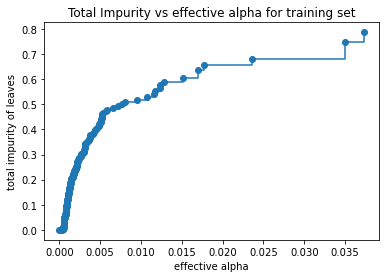

In [253]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [254]:
clfs = []
for ccp_alpha in ccp_alphas:
    arbol = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    arbol.fit(X_train, y_train)
    clfs.append(arbol)

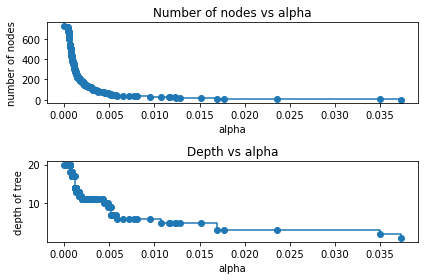

In [255]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [arbol.tree_.node_count for arbol in clfs]
depth = [arbol.tree_.max_depth for arbol in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy


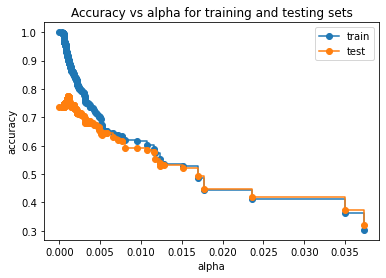

In [256]:
train_scores = [arbol.score(X_train, y_train) for arbol in clfs]
test_scores = [arbol.score(X_test, y_test) for arbol in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## **Random Forest**

El método Random Forest es una técnica de aprendizaje automático que se utiliza tanto para problemas de clasificación como de regresión. Consiste en la construcción de múltiples árboles de decisión mediante muestreo con reemplazo y aleatoriedad en las características, y luego combina sus resultados para mejorar la precisión y la capacidad de generalización del modelo.
Random Forest tiene la capacidad de reducir la varianza y el sobreajuste (overfitting) en comparación con un solo árbol de decisión.

In [137]:
X = DataO[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = DataO['NObeyesdad']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

* Random forest n_estimator y test accuracy

Para determinar el número ideal de estimadores (n_estimators) en el modelo, se realizará un gráfico que muestra cómo varía la precisión en el conjunto de prueba en función de esta cantidad. Esta visualización permitirá tomar una decisión fundamentada sobre la configuración óptima del Random Forest.

Text(0, 0.5, 'Testing Accuracy')

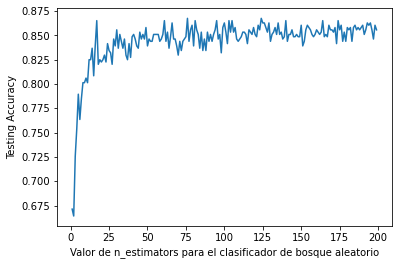

In [281]:
scoresrf =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_predrf = rfc.predict(X_test)
    scoresrf.append(accuracy_score(y_test, y_predrf))
plt.plot(range(1, 200), scoresrf)
plt.xlabel('Valor de n_estimators para el clasificador de bosque aleatorio')
plt.ylabel('Testing Accuracy')

Creación y entrenamiento del modelo

In [284]:
modelo = RandomForestClassifier(random_state=123, n_estimators=200,
                               class_weight="balanced", max_features="log2")

In [285]:
modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=123)

In [286]:
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.7672369140425294


* Validación empleando el Out-of-Bag error

Valor óptimo de n_estimators: 96


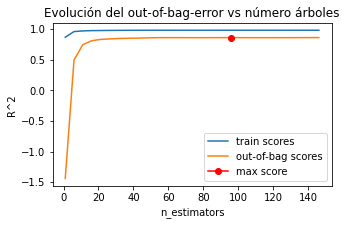

In [166]:
warnings.filterwarnings('ignore')
train_scores = []
oob_scores   = []

estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
warnings.filterwarnings('default')

In [167]:
#oob score
model_rf_oob = RandomForestClassifier(n_estimators=132, max_features=6, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)
     

OOB Score:			 0.8454
Testing Accuracy:		 0.8771
Acc. Difference:		 0.0317


* Validación empleando k-cross-validation y neg_root_mean_squared_error

Valor óptimo de n_estimators: 141


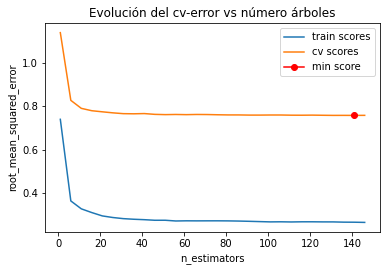

In [161]:
train_scores = []
cv_scores    = []

estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
            n_estimators = n_estimators,
            criterion    = 'squared_error',
            max_depth    = None,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123)

    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Si bien el valor óptimo de las métricas se alcanza con 96 y 141 árboles, las curvas indican que, a partir de 10 árboles, el error de validación del modelo se estabiliza.